Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 04: Analysis of behavioural data (part 2)

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 14, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will have a closer look on the data of Seahaven using analysing techniques like ANOVA, linear regression models and t-tests. For the correct results we will provide you with the finalized data that you only have to read in. Note that especially the data for assignment 2 and 3 underwent some further preprocesing than what we did in the previous exercise.

## Assignment 0: Peer review for sheet 03 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 6, 2 | 10, 7  | 1, 6  | 8, 9 | 7, 1 | 9, 8 | 3, 10  | 5, 11  | 4, 3  | 11, 5 | 2, 4  |

Please also evaluate nice coding style with up to two points.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns
sns.set()
from PIL import Image
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

## Assignment 1: Linear Regression Model Based on Performance and Reaction Time [2 pts]

Although the linear regression in the prior exercise sheet (assignment 2.a) does not suggest a relationship between RT and performance (accuracy) for the relative task, we still want to check how much of the performance is explained by the RT. To do so we fit a linear regression model by using the ```ols``` method in the ```statsmodels``` library for both of the time conditions (3sec and Infinite).

- Read ```AllData.csv``` into the dataframe ```AllData``` and take only the data of the relative task. 
- Split the data of the relative task: Create ```SecData``` with the data of the 3sec-condition and ```InfData``` with the data of the Infinite-condition.
- For each dataset (SecData, InfData) use the ```statsmodels```’ ```ols``` function to initialise a simple linear regression model. <br> The ```ols``` function takes the following: **ols("y ~ X", df)**, where X is the predictor variable ("ReactionTime"), y is the output variable ("Performance") and df is the dataframe of the used data.
- Have a look on the R-squared values and interpret them.

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use the function.

In [285]:
PATH = os.getcwd() + "/Data/AllData.csv"

AllData = pd.read_csv(PATH)
RelData = AllData[AllData['Task'] == 'Relative']
SecData = RelData[RelData['Time'] == '3sec']
InfData = RelData[RelData['Time'] == 'Infinite']

SecModel = ols('Performance ~ ReactionTime', SecData).fit()

InfModel = ols('Performance ~ ReactionTime', InfData).fit()

SecModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.195
Date:                Fri, 10 May 2019   Prob (F-statistic):             0.0433
Time:                        12:03:16   Log-Likelihood:                 78.822
No. Observations:                  97   AIC:                            -153.6
Df Residuals:                      95   BIC:                            -148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4099      0.065      6.330      0.000       0.281       0.538
ReactionTime     0.0750      0.037      2.048      0.043       0.002       0.148
==============================================================================
Omnibus:                        5.909   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.938
Skew:                           0.604   Prob(JB):                       0.0513
Kurtosis:                       2.900   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation
#### 3sec Task
A R2 value of 0.042, indicates that about 4% percent of the variation in the Performance is due to variation in the Reaction Time
#### Infinite Task
A R2 value of 0.118, indicates that about 11% percent of the variation in the Performance is due to variation in the Reaction Time

In conclusion, this means that the variation in the subjects' Performance can be explained better by Reaction Time in the 
Infinite Task than the 3sec task. This intuively makes sense since the possible values for reaction Times in the 3sec Task are limited to 3sec.

In [284]:
InfModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     12.72
Date:                Fri, 10 May 2019   Prob (F-statistic):           0.000568
Time:                        12:03:10   Log-Likelihood:                 86.422
No. Observations:                  97   AIC:                            -168.8
Df Residuals:                      95   BIC:                            -163.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4826      0.025     19.197      0.000       0.433       0.533
ReactionTime     0.0228      0.006      3.567      0.001       0.010       0.035
==============================================================================
Omnibus:                        3.385   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.764
Skew:                           0.390   Prob(JB):                        0.251
Kurtosis:                       3.275   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assignment 2: Testing Task Performance via ANOVA [5 pts]

For this assignment we will have a look on the whole data without caring about the different measurements.

### a) Task Performance [2 pts]

Refering to our plots of the prior exercise sheet (assignment 2.b), it is a good idea to have a closer look on the task performance (accuracy) to check if there are some **significant effects, i.e. p < 0.05**. To do so we will first of all visualize the data with a raincloud-plot using ```ptitprince.RainCloud``` as a density estimate and then calculate the ANOVAs. Make sure to run ```pip install ptitprince``` in your activated acc environment beforehand.

- Read ```MapPerformances.csv``` into the dataframe ```AllPerformances```.
- Make a RainCloud-plot of the tasks (x-axis) and performance (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.25 and end at 0.75.
- Have a look at ```help(pt.RainCloud)``` to get an overview of the different parameters that you can modify to create a nice raincloud-plot.

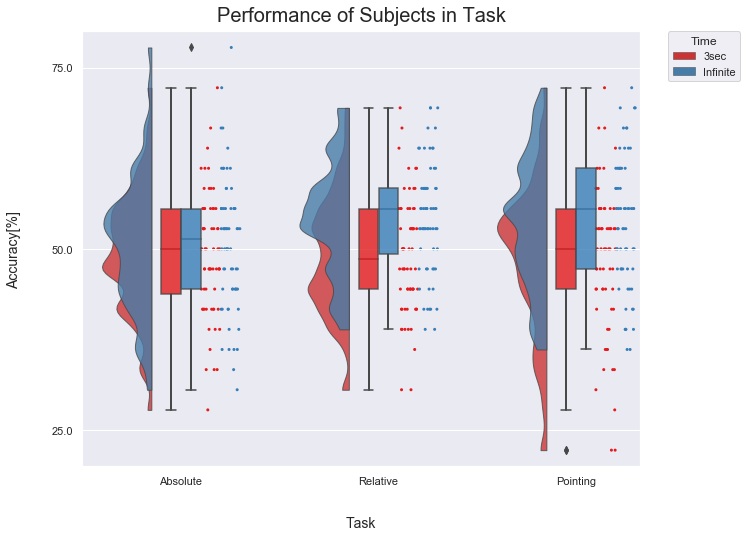

In [264]:
#help(pt.RainCloud)

#extracting data from csv file (as dataframe)
PATH = os.getcwd() + "/Data/MapPerformances.csv"
AllPerformances = pd.read_csv(PATH)

#setup for raincloud plot
fig, axes = plt.subplots(nrows = 1, ncols=1)
fig.set_size_inches(10,8)

#raincloud plot
ax = pt.RainCloud(x='Task', 
                  y='Performance', 
                  hue='Time',             #additional hue to be able to discriminate between '3sec' and 'Infinite'
                  data=AllPerformances, 
                  width_viol=0.5,         #width of violin plot
                  width_box=0.2,          #width of boxplot
                  palette='Set1',         #colour setting
                  move=0.2,               #moves rain along x axis
                  alpha= 0.8,             #sets transparency of colour
                  bw=0.18,                #smoothing parameter
                  dodge = True,           #separates data from different hue levels
                  offset=0.15,            #moves cloud along x axis
                  ax=axes)

#settings for y axis
#labeling
ax.set_ylabel('Accuracy[%]', fontsize =14, labelpad=30)
#limits
plt.ylim(0.2,0.8)
#displayed ticks
p = plt.yticks(np.linspace(start=0.25,stop=0.75,num=3), np.linspace(start=25,stop=75,num=3))

#labeling adjustments and Title
ax.set_xlabel('Task', fontsize =14, labelpad=30)
ax.set_title('Performance of Subjects in Task', fontsize=20, pad=10)

Using the data of ```AllPerformances``` we now want to calculate a **two-way ANOVA**. A two-way ANOVA is a statistical test used to determine the effect of two nominal predictor variables (= independent variables) on a continuous outcome variable (= dependent variable).

H$_{01}$ = The performance is the same for the different tasks. <br>
H$_{02}$ = The performance is the same for the different time conditions. <br>
H$_{03}$ = An interaction effect does not exist.

- Given the null hypotheses above, what is the outcome variable and what are the predictor variables that you have to use for the two-way ANOVA?
- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. <br> The ```ols``` function takes the following: **ols("y ~ C(X1) * C(X2)", df)**, where X1 and X2 are the predictor variables, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 2** two-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html), the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) and the [anova_lm documentation](http://www.statsmodels.org/dev/anova.html) to get a feeling how to use these functions.

### Choosing Variables

Since we want to obtain information about how Performance is influenced by Task Time and both together, 
- **Performance** has to be the dependent variable/continuous outcome variable whereas
- **Task** and **Time** have to be the two independent/nominal predictor variables.

In [289]:
#creating Model investigating the relation of 
#Performance and Task
#Performance and Time
#Performance and Task plus Time together
#a * b is short-hand for a + b + a:b
olsModel = ols('Performance ~ C(Task) * C(Time)', AllPerformances).fit()

#calculating type 2 Anova
model = anova_lm(olsModel, typ=2)
type2

,sum_sq,df,F,PR(>F)
C(Task),0.020741,2.0,1.323139,0.267528
C(Time),0.146484,1.0,18.689569,0.000020
C(Task):C(Time),0.027500,2.0,1.754358,0.174424
Residual,2.962674,378.0,NaN,NaN


Interpreting the results in the last column: <br>
C(Task ) :        1 - pf ( F(Task), df= 2, 378 ) $\rightarrow$ > 0.05
<br>
C(Time ) :        1 - pf ( F(Time), df= 1, 378 ) $\rightarrow$ **< 0.05**
<br>
C( T : T ):       1 - pf ( F( T:T ), df= 2, 378 ) $\rightarrow$ > 0.05
<br> <br>

### Interpretation
From the last column in the table, we can infer that only C(Time) is < 0.05 and therefore statistically significant. <br><br>
H$_{01}$ = The performance is the same for the different tasks. 
- Since Performance is not statistically significantly influenced by  the Task type,<br>we can **not reject H$_{01}$.** <br>

H$_{02}$ = The performance is the same for the different time conditions. 
- Since there is a statistically significant result indicating that Time influences Performance, <br>we can **reject H$_{02}$** <br>

H$_{03}$ = An interaction effect does not exist. 
- Since Performance is not statistically significantly influenced by the Interaction term, <br>we can **not reject H$_{03}$.** <br>

### b) Task Performance: 3sec Condition vs. Infinite Condition [3 pts]

Let's take a closer look onto the single time conditions by calculating a **one-way ANOVA** for each time condition (3sec and Infinite). A one-way ANOVA is a statistical test used to determine the effect of one nominal predictor variable (= independent variable) on a continuous outcome variable (= dependent variable). 

H$_{01}$ = The performance is the same for the different tasks. <br>

- Use the data of ```AllPerformances``` and split it: Create ```SecPerformances``` with the data of the 3sec-condition and ```InfPerformances``` with the data of the Infinite-condition.
- Given the null hypothesis above, what is the outcome variable and what is the predictor variable that you have to use for the one-way ANOVAs?

Do for each dataset (SecPerformances, InfPerformances):

- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. The ```ols``` function takes the formula <br> The ```ols``` function takes the following: **ols("y ~ C(X)", df)**, where X is the predictor variable, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 1** one-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain if the null hypothesis can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use this function.

### Choosing Variables

Since we want to obtain information about how Performance is influenced by the Tasks
- **Performance** has to be the dependent variable/continuous outcome variable whereas
- **Task** has to be the two independent/nominal predictor variable.

In [353]:
#splitting AllPerformances to separate Task conditions
SecPerformances = AllPerformances[AllPerformances['Time'] == '3sec']
InfPerformances = AllPerformances[AllPerformances['Time'] == 'Infinite']

#creating ols Models for both Time conditions investigating the relation of Performance and Task condition
SecOlsModel = ols('Performance ~ C(Task)', SecPerformances).fit()
InfOlsModel = ols('Performance ~ C(Task)', InfPerformances).fit()

#calculating anova type 1 for the Sec condition
modelSec = anova_lm(SecOlsModel, typ = 1)
print("Relation between Performance and Task type - 3sec Time condition:")
modelSec

Relation between Performance and Task type - 3sec Time condition:


,df,sum_sq,mean_sq,F,PR(>F)
C(Task),2.0,0.000635,0.000317,0.039362,0.961411
Residual,189.0,1.524426,0.008066,NaN,NaN


In [354]:
modelInf = anova_lm(InfOlsModel, typ = 1)
print("Relation between Performance and Task type - Infinite Time condition:")
modelInf

Relation between Performance and Task type - Infinite Time condition:


,df,sum_sq,mean_sq,F,PR(>F)
C(Task),2.0,0.047606,0.023803,3.127978,0.046082
Residual,189.0,1.438247,0.007610,NaN,NaN


### Interpretation
From the last column in the table, we can infer that only the result for the Infinite Task is < 0.05 and therefore statistically significant. The result for the 3sec Task however is not statistically significant since the value is > 0.05 <br><br>

H$_{01}$ = The performance is the same for the different tasks. 
- as stated above, the Performance is not significantly influenced by the Task Type concerning the 3sec Time condition. <br>This would not lead to a rejection of H$_{01}$ (if we were only looking at the 3sec condition). 
- but looking at the Infinite condition we have indeed obtained a statistically relevant result stating that the Task Type influences Performance. This leads to a rejection of H$_{01}$ for the Infinite Time condition.
- Thus, in conclusion, we can **reject H$_{01}$** since we reject it for the Infinite Time condition.

If there is a significant outcome for one of the datasets (SecPerformances or InfPerformances), make a post-hoc paired t-test using this dataset.

- Extract the performances for each task (Absolute, Relative, Pointing).
- Compare the performances of the different tasks pairwise using ```scipy.stats.ttest_rel```
- Why do we need to do further post-hoc tests and what do they tell us?

In [348]:
#old[['A', 'C', 'D']].copy()
AbsInf = InfPerformances[InfPerformances['Task'] == 'Absolute']['Performance'].copy()
RelInf = InfPerformances[InfPerformances['Task'] == 'Relative']['Performance'].copy()
PointInf = InfPerformances[InfPerformances['Task'] == 'Pointing']['Performance'].copy()

print("Absolute - Relative: "+str(stats.ttest_rel(AbsInf, RelInf)))
print("Absolute - Pointing: "+str(stats.ttest_rel(AbsInf, PointInf)))
print("Relative - Pointing: "+str(stats.ttest_rel(RelInf, PointInf)))

Absolute - Relative: Ttest_relResult(statistic=-2.549420177654396, pvalue=0.013236758937606112)
Absolute - Pointing: Ttest_relResult(statistic=-1.8697272275281769, pvalue=0.06617015143684292)
Relative - Pointing: Ttest_relResult(statistic=0.38334190525937933, pvalue=0.702756818654483)


### Interpretation

The Tests we did above do only consider whether the Task type in general influences the Performance of the subjects. We have found out that for the Infinite Time condition, the Task types indeed influence the Performance. <br> 
From this however we can not infer whether it is all Task types that influence the Performance, only two or only a single Type. <br> To obtain information about whether and to which extend each individual Tasks influences the Performance, we need post-hoc Tests.

The TTest is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.

#### Results:
- there is no statistically relevant relation between the average of the Performance of the Pointing vs. the two other Tasks (both p values > 0.05). <br>
- However, there is a statistically significant relation between the Performances of the Absolute Task and the Relative Task (p value < 0.05).

#### Conclusion:
- It is only the Absolute and Relative Task type that significantly influence the Performance of the subject


## Assignment 3: Testing Task Performance via Repeated Measures ANOVA [3 pts]

Now we want to take a closer look on the task performance (accuracy) also taking the different measurements into account to check if there are some **significant effects, i.e. p < 0.05**. For this purpose we have the averaged performances over 15 repeated measure subjects for three measurements. We will first of all visualize the averaged performances for each task for the three measurements with a catplot and then calculate a repeated measures ANOVA. 

- Read ```RepeatedPerformances.csv``` into the dataframe ```RepeatedPerformances```.
- Make a catplot (kind='barplot') of the conditions (x-axis) and the performance (y-axis). The y-axis should start at 0 and end at 0.75.
- Please note that the conditions in the dataframe correspond to the given "conditions" list.

In [ ]:
conditions = ["Absolute - 3sec ","Absolute - Infinite","Relative - 3sec ","Relative - Infinite","Pointing 3sec","Pointing - Infinite"]



In [ ]:
# create a usable dataframe for the following analysis
repgroup = RepeatedPerformances.groupby(['Measurement','Subject','Condition'], as_index=False)['Performance'].mean()

RepeatedDf = pd.DataFrame(columns={'Measurement','Subject','Task','Time','Performance'})
tasks = ['Absolute','Absolute','Relative','Relative','Pointing','Pointing']
times = ['3sec','Infinite','3sec','Infinite','3sec','Infinite']
for i in range(270):
    RepeatedDf = RepeatedDf.append({'Subject':repgroup['Subject'][i],'Measurement':repgroup['Measurement'][i],'Task':tasks[repgroup['Condition'][i]],'Time':times[repgroup['Condition'][i]],'Performance':repgroup['Performance'][i]},ignore_index=True)
    

Using the data of ```RepeatedDf``` we want to calculate a **(three-way) repeated measures ANOVA**. A (three-way) repeated measures ANOVA in general is a statistical test used to determine the effect of three nominal predictor variables (= within-subject factors) on a continuous outcome variable (= dependent variable). 



- What is the dependent variable and what are the within-subject factors that you have to use for the repeated measures ANOVA?
- Formulate the null hypotheses that the repeated measures ANOVA has to test.
- Calculate a repeated measures ANOVA using ```statsmodels```' ```AnovaRM```. 
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ANOVARM documentation](http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM) to get a feeling how to use this function.

In [ ]:
# TODO

## Assignment 4: Spatial coverage of Seahaven [Bonus]

To get a better feeling of the spatial coverage of Seahaven, we can create an overview of the houses that the subjects have seen. With a colormap it is easy to display the spatial coverage in an intuitive way.

- Open the image ```map5.png``` as ```SeahavenMap``` and read ```Clicks.csv``` into a dataframe ```NumClicks```.
- Draw a solid circle for each house. Use the x- and y-coordinates of ```NumClicks``` for the positioning of the circles.
- The column "clicks" from ```NumClicks``` displays how many subjects had visited the respective house. Use these click-values to calculate each circle's colour:

$CircleColor = cmap((click[i]-min(clicks))/(max(clicks)-min(clicks)))$

$clicks$: list/array of all click-values from the dataframe ```NumClicks``` <br>
$click[i]$: a certain click-value from the dataframe ```NumClicks``` at position $i$

In [ ]:
# open the files and extract the necessary data
# TODO


# set everything up to display the Seahaven Map
fig = plt.figure(figsize=(15,15))
SeahavenMap = SeahavenMap.resize((450,500))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.imshow(SeahavenMap, aspect = 'equal')

# choose a colormap for the circles that display the houses
cmap = plt.cm.get_cmap('Reds')

# draw the circles and give them the right color (using the given colormap)
# TODO


# set everything up to display the Colormap / legend for the circle's colors
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (0, 9),rowspan=10)
plt.imshow(a,aspect='auto',cmap='Reds',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace((min(clicks)/64)*100,(max(clicks)/64)*100,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Percentage of Subjects That Have Seen This House",rotation=270, fontsize=15, labelpad=20)
ax2.yaxis.set_label_position("right")
plt.show()